<a href="https://colab.research.google.com/github/NaSmith02/Skyline-Math-200/blob/main/NS_Python_Notebook_Setup_by_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# This is formatted as code`
```

Research Question #1 Is there an association between between the time you wake up on the days you have school or work and feeling that difficulties could not be done? : Include question here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1

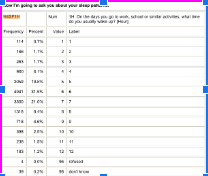

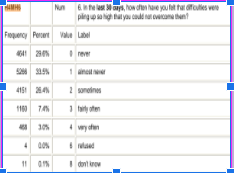

In [3]:
#Manage data for variable 1 (Wake_time)

In [ ]:
df['H4SP1H'].value_counts()

In [ ]:
df['Hour_Wake'] = df['H4SP1H']
df['Hour_Wake']= pd.to_numeric(df['Hour_Wake'],errors= 'coerce')
df['Hour_Wake']= df['Hour_Wake'].loc[df['Hour_Wake'] < 96]
df['Hour_Wake']= df['Hour_Wake'].loc[df['Hour_Wake'] < 98]
df['Hour_Wake']= df['Hour_Wake'].loc[df['Hour_Wake'] != ' ']
df['Hour_Wake'].value_counts()

In [ ]:
df['H4SP1M'].value_counts()

In [ ]:
df['Minutes_Wake']= df['H4SP1M']
df['Minutes_Wake']= pd.to_numeric(df['Minutes_Wake'],errors= 'coerce')
df['Minutes_Wake']= df['Minutes_Wake'].loc[df['Minutes_Wake'] < 96]
df['Minutes_Wake']= df['Minutes_Wake'].loc[df['Minutes_Wake'] < 98]
df['Minutes_Wake']= df['Minutes_Wake'].loc[df['Minutes_Wake'] != ' ']
df['Minutes_Wake'].value_counts()

In [ ]:
df['H4SP1T'].value_counts()

In [ ]:
df['Am_Pm_Wake']=df['H4SP1T']
df['Am_Pm_Wake'] = df['Am_Pm_Wake'].loc[df['Am_Pm_Wake'] !=' ']
df['Am_Pm_Wake'] = df['Am_Pm_Wake'].loc[df['Am_Pm_Wake'] <'6']
df['Am_Pm_Wake'] = df['Am_Pm_Wake'].loc[df['Am_Pm_Wake'] <'8']
df['Am_Pm_Wake'].replace(['1','2'],['AM','PM'],inplace=True)
df['Am_Pm_Wake'].value_counts()

In [ ]:
df_time_convert= df[['Am_Pm_Wake','Hour_Wake','Minutes_Wake']]
#df_time_convert = df[['am_pm', 'hour', 'minutes']]

In [ ]:
#Drops the missing values/cleans it 
df_time_convert.dropna(inplace=True)

In [ ]:
df_time_convert

In [ ]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [ ]:
#df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['hour'],x['minutes'],x['am_pm']),axis = 1)

In [ ]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['Hour_Wake'],x['Minutes_Wake'],x['Am_Pm_Wake']),axis = 1)
#axis=1, to the column, apply the values 
df_time_convert

In [ ]:
#df= df.assign(Name for the times = df_time_convert['Time Value (float)'])

In [ ]:
df= df.assign(Wake_Military_Times= df_time_convert['Time Value (float)'])

In [ ]:
df['H4SP1T'].value_counts()

In [ ]:
df['Wake_Military_Times'].mode().round(2)

In [4]:
#Graphs and tables or statistics

In [ ]:
df['Wake_Military_Times']

In [ ]:
df['Wake_Military_Times'].describe().round(2)

In [ ]:
sns.histplot(x = 'Wake_Military_Times', data =df, stat='percent', bins = 15, color = 'pink', kde = True)

In [ ]:
sns.boxplot(x = 'Wake_Military_Times', data =df, color ='pink')v 

In [ ]:
#Manage data for variable #2 (Difficulties)

In [ ]:
df['H4MH6'].value_counts()

In [ ]:
df['EXP'] = df['H4MH6']

In [ ]:
df['EXP'] = df['EXP'].loc[ df['EXP'] !=' ']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='8']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='6']
df['EXP'].value_counts()

In [ ]:
#Graphs and tables

In [ ]:
df['EXP'].replace(['0','1','2','3','4'] , ['Never', 'Almost Never', 'Sometimes','Fairly Often','Very Often'], inplace = True)
df['EXP'].value_counts()

In [ ]:
df['EXP'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['pink', 'hotpink', 'rosybrown', 'gray', 'skyblue'])

In [ ]:
plt.xlabel("How often")
plt.ylabel("Percent")
plt.title("How often have you felt difficulties were so high you could not overcome them")
df['EXP'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.2, alpha = 0.5, grid = True)


```
`# This is formatted as code`
```

Research Question #2 Is there an association between how often you damaged property you didn’t own in the past year and how often did you stole something worth more than 50 dollars in the past year

Codebook 2:

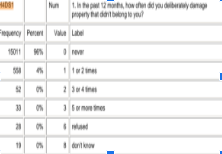

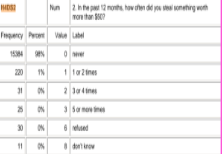

In [5]:
#Manage data for variable 1 (Property_damage)

In [ ]:
df['H4DS1'].value_counts()

In [ ]:
df['EXP'] = df['H4DS1']

In [ ]:
df['EXP'] = df['EXP'].loc[ df['EXP'] !=' ']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='8']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='6']
df['EXP'].value_counts()

In [6]:
#Graphs and tables or statistics

In [ ]:
df['EXP'].replace(['0','1','2','3'] , ['Never', '1 or 2 times', '3 or 4 times','5 or more times'], inplace = True)
df['EXP'].value_counts()

In [ ]:
explode = (50, 60, 80, 90)
df['EXP'].value_counts().plot(kind ='pie', autopct='%90f%%',  x=explode, shadow=True, startangle=80)
plt.legend(loc ="lower right")

In [ ]:
plt.xlabel("How often")
plt.ylabel("Percent")
plt.title("how often did you damage property that didn't belong to you")
df['EXP'].value_counts(normalize = True).plot(kind ='barh', color = 'hotpink', width = 0.8, alpha = 1.0, grid = True)

In [ ]:
#Variable #2 (Steal)

In [ ]:
df['H4DS2'].value_counts()

In [ ]:
df['EXP'] = df['H4DS2']

In [ ]:
df['EXP'] = df['EXP'].loc[ df['EXP'] !=' ']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='8']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='3']
df['EXP'].value_counts()

In [ ]:
#Graphs and tables or statistics

In [ ]:
df['EXP'].replace(['0','1','2','6'] , ['Never', '1 or 2 times', '3 or 4 times','5 or more times'], inplace = True)
df['EXP'].value_counts()

In [ ]:
explode = (50, 60, 80, 90)
df['EXP'].value_counts().plot(kind ='pie', autopct='%90f%%',  x=explode, shadow=True, startangle=80)
plt.legend(loc ="lower right")

In [ ]:
plt.xlabel("How often")
plt.ylabel("Percent")
plt.title("how often did you steal something worth more than 50 dollars")
df['EXP'].value_counts(normalize = True).plot(kind ='barh', color = 'hotpink', width = 0.8, alpha = 1.0, grid = True)